- Generate the number distribution of similarity scores (Euclidean or cosine distances) computed by the classifer model for seven ice phases and liquid phase.

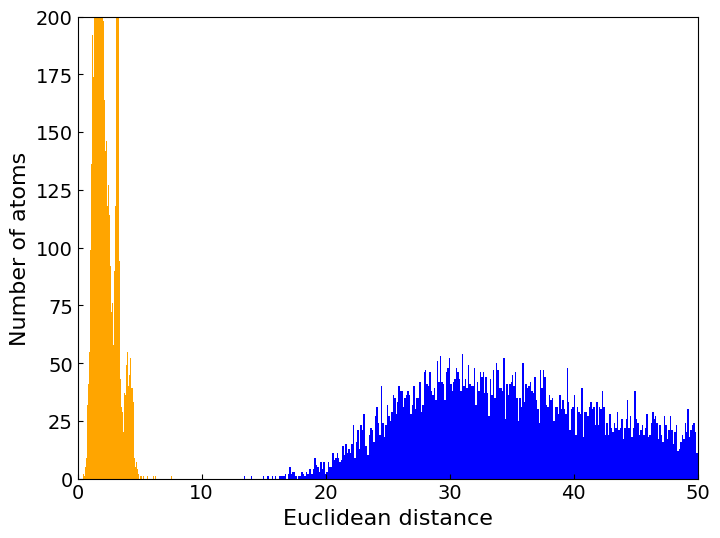

In [2]:
#Generate the distribution plot of minimum Euclidean distances 
#for all seven ice phases and liquid wate after denoising

folder='../results_classify/'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

state = 'after_denoiser_water_pca_dist_30'
cos_all = np.load(f'{folder}/sim_score_list_{state}.npy')


# Create the figure and set its size
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(cos_all[-11264:], bins=2000, color='blue', label='water')
ax.hist(cos_all[:-11264], bins=2000, color='orange',label='bulk phases')
ax.set_ylim(0,200)
ax.set_xlabel('Euclidean distance',fontsize=16)
ax.set_ylabel('Number of atoms',fontsize=16)
ax.tick_params(axis='both', which='both', direction='in', labelsize=14)
# #ax.set_xlim(0.95, 1.1)
ax.set_xlim(0.0, 50)
plt.savefig('distri_min_dist_bulkwater_after_denoise.pdf',format='pdf',transparent=True)

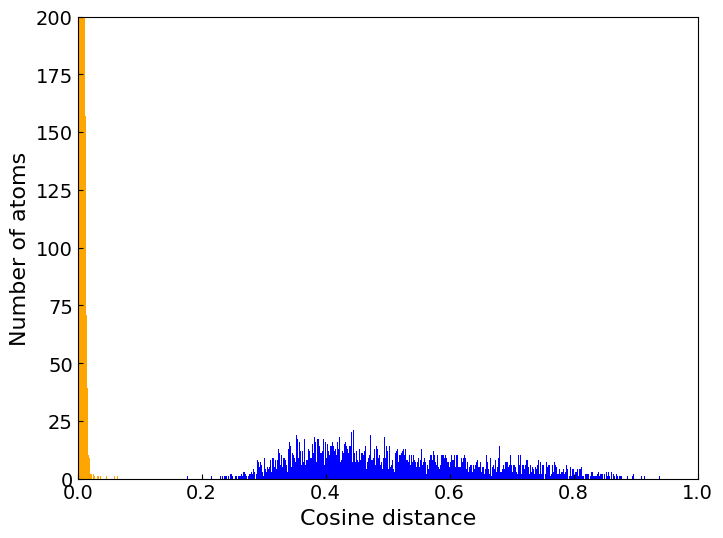

In [3]:
#Generate the distribution plot of minimum cosine distances 
#for all seven ice phases and liquid water after denoising

folder='../results_classify/'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

state = 'after_denoiser_water_pca_cos_30'
cos_all = np.load(f'{folder}/sim_score_list_{state}.npy')


# Create the figure and set its size
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(cos_all[-11264:], bins=2000, color='blue', label='water')
ax.hist(cos_all[:-11264], bins=2000, color='orange',label='bulk phases')
ax.set_ylim(0,200)
ax.set_xlabel('Cosine distance',fontsize=16)
ax.set_ylabel('Number of atoms',fontsize=16)
ax.tick_params(axis='both', which='both', direction='in', labelsize=14)
# #ax.set_xlim(0.95, 1.1)
ax.set_xlim(0.0,1.0)
plt.savefig('distri_min_cos_bulkwater_after_denoise.pdf',format='pdf',transparent=True)

- Generate the distribution plot of similarity socres for the three liquid-ice interface structures before and after denoising

In [4]:
#Generate the distribution plot of minimum cosine distances 
#for the three liquid-ice interface structures before and after denoising

import numpy as np
folder='../results_classify/'
before_denoiser=False

if before_denoiser:
    state = 'before_denoiser'
else:
    state = 'after_denoiser'
labels= np.load(f'{folder}/labels_all_{state}_cos_interface.npy')
scores= np.load(f'{folder}/sim_score_list_{state}_cos_interface.npy')

import pandas as pd
df_interface=pd.DataFrame(np.vstack([labels,scores])).T
columns={0:'labels',1:'score'}
df_interface.rename(columns=columns,inplace=True)
grouped_df=df_interface.groupby('labels')
label='interface_1c'
cos_all=grouped_df.get_group('interface_sI')['score'].values.astype(float)

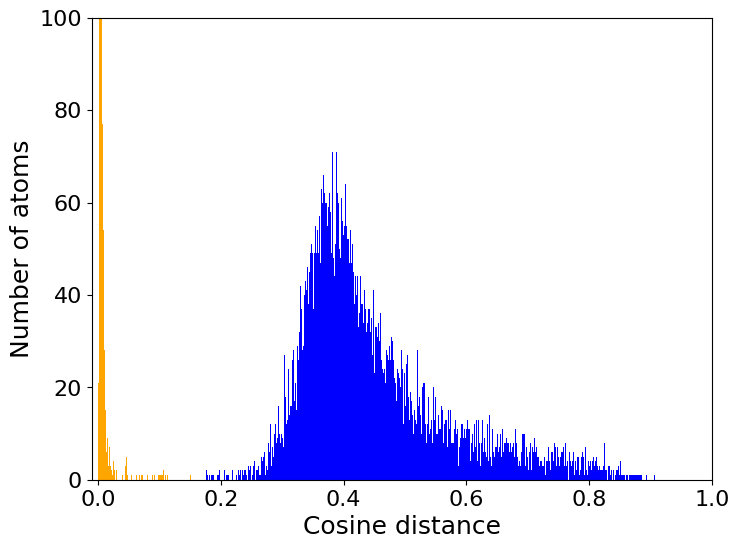

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
cos_threshold=0.17
cos_all_liquid = cos_all[cos_all > cos_threshold]
cos_all_bulk = cos_all[cos_all <= cos_threshold]

# Create the figure and set its size
fig, ax = plt.subplots(figsize=(8, 6))
if before_denoiser:
    ax.hist(cos_all, bins=800, alpha=1, color='blue')
else:
    ax.hist(cos_all_liquid, bins=500, alpha=1, color='blue', label='Liquid')
    ax.hist(cos_all_bulk, bins=500, alpha=1, color='orange', label='Bulk')

ax.set_xlabel('Cosine distance',fontsize=18)
ax.set_ylabel('Number of atoms',fontsize=18)
ax.tick_params(axis='both', which='both', direction='out', labelsize=16)
# #ax.set_xlim(0.95, 1.1)
ax.set_ylim(0,100)
ax.set_xlim(-0.01,1.0)
plt.savefig(f'distri_min_cos_{label}_{state}.pdf',format='pdf',transparent=True)


- Color coding the liquid-bulk interface structures with the predicted labels before and after denoising

In [6]:
folder='../results_classify/'
before_denoiser=False

if before_denoiser:
    state = 'before_denoiser'
else:
    state = 'after_denoiser'
labels= np.load(f'{folder}/labels_all_{state}_cos_interface.npy')
preds= np.load(f'{folder}/pred_all_{state}_cos_interface.npy')


import pandas as pd
df_interface=pd.DataFrame(np.vstack([labels,preds])).T
columns={0:'labels',1:'preds'}
df_interface.rename(columns=columns,inplace=True)
grouped_df=df_interface.groupby('labels')

In [7]:

import ase.io
import glob
label_map={'w':0,'1c':1,'1h':2,'sI':3,'2':4,'3':5,'6':6,'7':7}
label_list=df_interface['labels'].unique()
traj_dir='../data/saved_denoised_trajs'
save_dir='../data/interface_colorcoded_trajs'
grouped_df=df_interface.groupby('labels')

for label in label_list:
    print(label)
    test_dump = glob.glob(f'{traj_dir}/ice_phase_{label}_*.extxyz')
    print(test_dump)
    for traj in test_dump:
        if before_denoiser:
            atoms=ase.io.read(traj,':')[0]
        else:
            atoms=ase.io.read(traj,':')[-1]
        atoms=atoms[[atom.index for atom in atoms if atom.symbol != 'H']]
        atoms.arrays['charge']=np.array([label_map.get(i,-1) for i in grouped_df.get_group(label)['preds'].values.astype(str)])
        print(atoms.arrays['charge'].shape)
        ase.io.write(f'{save_dir}/two_phase_{label}_{state}.xyz',atoms,format='extxyz')


interface_1c
['../data/saved_denoised_trajs/ice_phase_interface_1c_nequip_origin_v1.denoised.extxyz']
(8000,)
interface_1h
['../data/saved_denoised_trajs/ice_phase_interface_1h_nequip_origin_v1.denoised.extxyz']
(8000,)
interface_sI
['../data/saved_denoised_trajs/ice_phase_interface_sI_nequip_origin_v1.denoised.extxyz']
(12420,)
